In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#evaluation libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier

In [ ]:
#pip list

In [2]:
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit) = mnist.load_data()

In [3]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

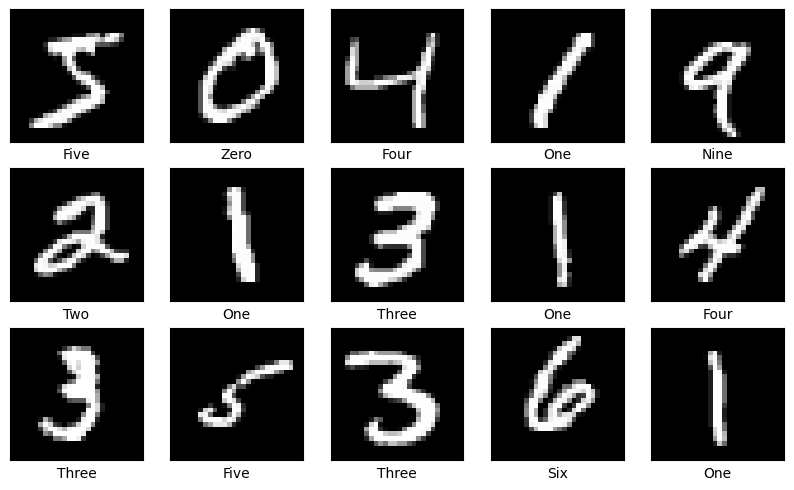

In [5]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visulaizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show

In [6]:
x_train_digit.shape

(60000, 28, 28)

In [7]:
x_train_digit = x_train_digit.reshape(60000,784)
x_test_digit = x_test_digit.reshape(10000,784)

In [8]:
x_train_digit.shape

(60000, 784)

In [9]:
y_train_digit.shape

(60000,)

In [10]:
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [11]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
#creating base neural network
model = keras.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    keras.layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    keras.layers.Dense(64,activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    keras.layers.Dense(10,activation='sigmoid'),
])

C:\Users\Pragadeesh K\Hope AI\aiml\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6501 - loss: 4.1442 - val_accuracy: 0.8670 - val_loss: 0.3667
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8883 - loss: 0.2750 - val_accuracy: 0.9084 - val_loss: 0.2324
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9130 - loss: 0.1696 - val_accuracy: 0.9302 - val_loss: 0.2002
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9329 - loss: 0.1245 - val_accuracy: 0.9250 - val_loss: 0.1823
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9335 - loss: 0.1055 - val_accuracy: 0.9292 - val_loss: 0.1584
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9325 - loss: 0.1000 - val_accuracy: 0.8928 - val_loss: 0.1964
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9309 - loss: 0.0907 - val_accuracy: 0.9476 - val_loss: 0.1406
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9353 - loss: 0.0826 - val_accuracy: 0.

In [16]:
y_predict=model.predict(x_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
y_predict[0]

array([5.5123683e-02, 9.9856055e-01, 6.6658267e-04, 5.5402625e-01,
       5.3315889e-03, 3.5522788e-08, 4.2204192e-14, 1.0000000e+00,
       9.9999964e-01, 9.9999964e-01], dtype=float32)

In [18]:
y_predicts=np.argmax(y_predict,axis=1)

In [19]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [21]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

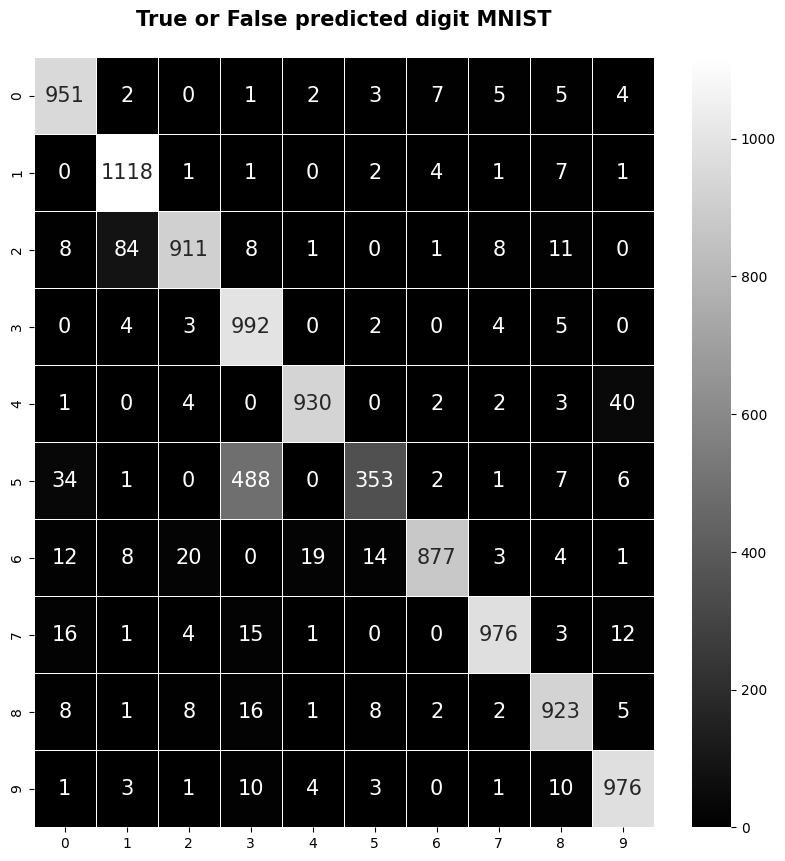

In [22]:
#Confusion matrix for Digit MNIST

con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight="bold",fontsize=15)
plt.show()

In [ ]:
# print(plt.style.available)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       980
           1       0.91      0.99      0.95      1135
           2       0.96      0.88      0.92      1032
           3       0.65      0.98      0.78      1010
           4       0.97      0.95      0.96       982
           5       0.92      0.40      0.55       892
           6       0.98      0.92      0.95       958
           7       0.97      0.95      0.96      1028
           8       0.94      0.95      0.95       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.90     10000
   macro avg       0.92      0.89      0.89     10000
weighted avg       0.92      0.90      0.89     10000



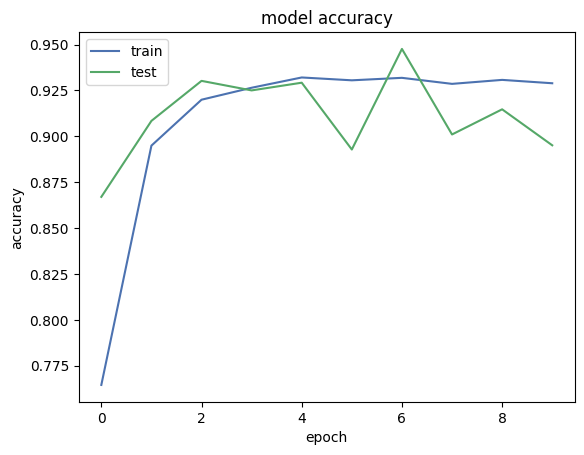

In [24]:
#summarize history of accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()


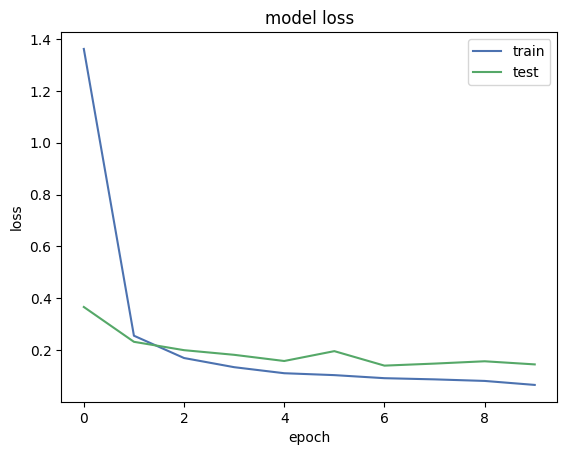

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()


In [26]:
import tensorflow as tf
import numpy as np

# Reshape and cast input
input_image = tf.expand_dims(x_test_digit[2], axis=0)  # (1, 28, 28)
input_image = tf.expand_dims(input_image, axis=-1)     # (1, 28, 28, 1)
input_image = tf.cast(input_image, tf.float32) / 255.0  # Cast and normalize

# Predict
y_predict_single = model.predict(input_image)
y_predict_single_class = np.argmax(y_predict_single, axis=1)

# Get true label
y_test_digit_eval = np.argmax(y_test_digit, axis=1)

# Output
print("Predicted class:", y_predict_single_class[0])
print("True class:     ", y_test_digit_eval[2])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted class: 8
True class:      1


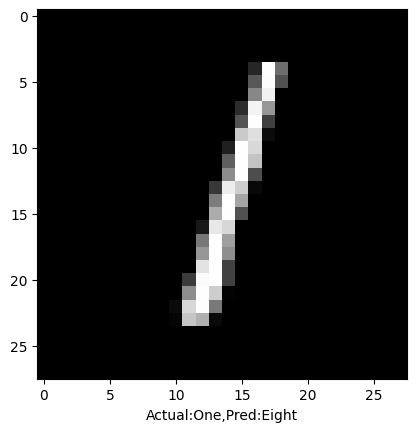

In [27]:
#Names of numbers in dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28),cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predict_single_class[0]]))
plt.show()